# Is Mastodon Actually Better than Twitter? - A Closer Look at Privacy Policies 

## Introduction

In January of 2022, Elon Musk indicated [interest in acquiring Twitter](https://apnews.com/article/twitter-elon-musk-timeline-c6b09620ee0905e59df9325ed042a609) by purchasing a small percentage of its shares. By October 27th of the same year, Musk closed a $44 billion deal to purchase Twitter and officially took over one of the major social media platforms in the world. With Musk’s mixed reputation in the technology space as well as [his vision](https://www.cnn.com/2022/10/28/tech/elon-musk-twitter-changes/index.html#:~:text=Musk%20has%20also%20said%20he,or%20demoted%20in%20their%20feed. ) for the platform, his leadership alarmed many users as he has heavily focused on profit and free speech over user trust and safety. In search of an alternative, users sought out a similar platform called Mastodon. [Mastodon](https://www.nytimes.com/2022/11/07/technology/mastodon-twitter-elon-musk.html ) is a social media platform that was founded in 2016 by software developer Eugen Rochko, and claims it can be a [“viable alternative to Twitter”](https://blog.joinmastodon.org/2022/04/twitter-buyout-puts-mastodon-into-spotlight/ ) as a free and open source platform where communication is not dictated by one commercial company. Its user base has [grown significantly](https://www.cnn.com/2022/12/20/tech/mastodon-twitter-usage/index.html) since Musk's takeover of Twitter.

Musk’s leadership at Twitter has raised many questions about how social media should be governed and operated. Among many issues that social media companies are scrutinized for, privacy and data are one of the major topics discussed. There have been many data breaches of social media companies such as the infamous [Cambridge Analytica Scandal](https://www.nytimes.com/2018/04/04/us/politics/cambridge-analytica-scandal-fallout.html) in 2018, where millions of Facebook user’s data were breached and used for political purposes. Considering the significance of privacy and data, this paper aims to compare the privacy policies of Twitter and its alternative Mastodon. 

The hypothesis for this paper is that Mastodon is a better social media platform than Twitter, therefore Mastodon must have a good if not a better privacy policy than Twitter. In this context, a good privacy policy means setting out, at minimum, answers to these questions building upon [guildelines set by UC Berkeley's Information Security Office](https://security.berkeley.edu/how-write-effective-website-privacy-statement#:~:text=Your%20privacy%20statement%20must%20accurately,you%20must%20inform%20your%20users): what kind of data are collected, what is the legal basis for collecting such data, how are these data are used, who to contact regarding policies, how long is data retained, what measures are taken to protect and secure data, and who has access to data. The goal is to compare the two policies to determine which platform has the more comprehensive policy that seeks to provide necessary information to users but also do due diligence to protect the data. Vague language as well as difficult and technical jargon used in the policies will be considered against the platforms’ policies.

For the purpose of this paper, technical jargon is limited to the use of abbreviations. For instance, if the policy states GDPR, a European regulation on data, instead of writing out General Data Protection Regulation, it will be considered a technical jargon. In terms of vague language, it will be limited to ambiguity coming from use of language that does not give certainty, such as ‘may’ will be considered. 

## Methodology

Data collection for this method is fairly simple. Privacy policies are to be collected by downloading directly from [Twitter](https://twitter.com/en/privacy) and [Mastodon](https://mastodon.social/privacy-policy)’s websites and by using PyMuPDF, the texts will be extracted. 

First part of the research will go through the questions to be answered in privacy policies via search using Python readlines functions. Then, technical jargon will be searched using the Spacy library. Data will be then cleaned up using NLTK.  

Considering Twitter’s privacy policy is longer and more detailed, using lexical density, a quantitative way of finding out breadth of vocabularies, the research seeks to answer which policy is more robust. Additionally, the Term Frequency-Inverse Document Frequency (TF-IDF) method will be used. Using this method, the most frequent and significant terms used in each company’s policies will be identified. Lastly, some of visualization tools will also be used. For instance, Word Cloud will show common words and visually demonstrate in sizes the relative frequency of the term mentioned in each of the policies, as well as a heat map showing the top 10 TF-IDF terms for each policy. 

Unless otherwise specified in this document, all codes used in this document are from the [Introduction to Text Analysis](https://github.com/intro-to-text-analysis-SIPA-S23/syllabus) course taught by Rebecca Krisel. 




## Data Scraping

First scrape the policy from PDF using PyMuPDF

Install PyMuPDF library

In [ ]:
!pip install PyMuPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.8 MB/s eta 0:00:00


Extract the text from the PDF files and create a text document

In [ ]:
import fitz #fitz is pymupdf
doc = fitz.open("Twitter_Privacy_Policy_EN.pdf")  # open document
out = open("twitter.txt", "wb")  # open text output
for page in doc:  # iterate the document pages
    text = page.get_text().encode("utf8")  # get plain text (is in UTF-8)
    out.write(text)  # write text of page
    out.write(bytes((12,)))  # write page delimiter (form feed 0x0C)
out.close()

In [ ]:
doc2 = fitz.open("Mastodon_Privacy_Policy.pdf")
out2 = open("mastodon.txt", "wb") 
for page2 in doc2:  # iterate the document pages
    text2 = page2.get_text().encode("utf8")  # get plain text (is in UTF-8)
    out2.write(text2)  # write text of page
    out2.write(bytes((12,)))  # write page delimiter (form feed 0x0C)
out2.close()

## Answering UC Berkley's Guidelines using readlines function. 

The following script is adopted from [GeeksforGeeks](https://www.geeksforgeeks.org/python-how-to-search-for-a-string-in-text-files/# )

Question 1: what kind of data are collected? For this question, "data" and "information" are used as search terms.


In [ ]:
word = 'data'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

data string exists in file
Line Number: 22
Line: We collect some data about you

data string exists in file
Line Number: 26
Line: We use your data to make Twitter better

data string exists in file
Line Number: 31
Line: how we use data, just ask

data string exists in file
Line Number: 34
Line: with my data?

data string exists in file
Line Number: 56
Line: What data do you collect about me?

data string exists in file
Line Number: 57
Line: You give some data, we get some data. In return we offer useful 

data string exists in file
Line Number: 154
Line: similar technologies to collect additional website usage data and to operate our 

data string exists in file
Line Number: 169
Line: or interest data, and content viewed or actions taken on a website or app. Some 

data string exists in file
Line Number: 304
Line: For more information about how we make public data on Twitter available 

data string exists in file
Line Number: 331
Line: Does data have an expiration 

data string exists

Looking at the document from line 56, Twitter provides very detailed information about the data collected including email address or phone number, date of birth, as well as user tracking data, such as content posted, interaction with other content, links that you interact with. Additionally, Twitter collects device and location information, even interactions with Twitter content on third-party sites.

In [ ]:
word = 'information'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

information string exists in file
Line Number: 7
Line: uses the personally identiﬁable information you may provide through the mastodon.social website or its

information string exists in file
Line Number: 8
Line: API. The policy also describes the choices available to you regarding our use of your personal information

information string exists in file
Line Number: 9
Line: and how you can access and update this information. This policy does not apply to the practices of

information string exists in file
Line Number: 12
Line: What information do we collect?

information string exists in file
Line Number: 13
Line: Basic account information: If you register on this server, you may be asked to enter a username, an e-

information string exists in file
Line Number: 14
Line: mail address and a password. You may also enter additional proﬁle information such as a display

information string exists in file
Line Number: 17
Line: Posts, following and other public information: The list of people

From line 12 of the Mastodon document, it states that username, e-mail address, password, content, log information, etc., are all collected. 

Mastodon seems to collect less information from users. This may be because the products that Twitter offers are more complex than Mastodon. 

Ultimately, both policies meet the minimum requirement of answering what data are collected. 


Question 2: what is the legal basis of collecting such data? For this question, "law" and "legal" are used as search terms.

In [ ]:
word = 'legal'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

legal string exists in file
Line Number: 8
Line: our regulators ask us to meet our legal 

legal string exists in file
Line Number: 219
Line: use, and illegal activity. We also use the information to evaluate and affect 

legal string exists in file
Line Number: 311
Line: comply with a law, regulation, legal process, or governmental request;

legal string exists in file
Line Number: 354
Line: to comply with legal requirements and for safety and security reasons.

legal string exists in file
Line Number: 407
Line: 6.1 We have specific legal bases to use your 

legal string exists in file
Line Number: 409
Line: Twitter has carefully considered the legal reasons it is permitted to collect, 

legal string exists in file
Line Number: 8
Line: our regulators ask us to meet our legal 

legal string exists in file
Line Number: 219
Line: use, and illegal activity. We also use the information to evaluate and affect 

legal string exists in file
Line Number: 311
Line: comply with a law, regulation

In line 407, section 6.1 of the document, Twitter mentions that it has "carefully considered the legal reasons it is permitted to collect,
use, share and otherwise process your information." There is no specific mention of the laws and regulation themselves. It does not fully answer the question but it does mention the legal basis. 

In [ ]:
word = 'law'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

law string exists in file
Line Number: 79
Line: your information when we believe release is appropriate to comply with the law, enforce our site policies,



Law is mentioned in Mastodon's policy, however, it also does not mention the legal basis on collection of the data. The statement is on sharing the data. 

For question 2, both Twitter and Mastodon do not cover the legal basis.

Question 3: how are data used? For this question, "use" is used as a search term.

In [ ]:
word = 'use'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

use string exists in file
Line Number: 4
Line: with a Privacy Policy. Most people who use 

use string exists in file
Line Number: 14
Line: when you use Twitter by making sure you 

use string exists in file
Line Number: 16
Line: information we collect, how it’s used, and 

use string exists in file
Line Number: 26
Line: We use your data to make Twitter better

use string exists in file
Line Number: 31
Line: how we use data, just ask

use string exists in file
Line Number: 36
Line: The information we collect when you use Twitter falls into three categories.

use string exists in file
Line Number: 38
Line: To use some of our products and services you need to have an account, and 

use string exists in file
Line Number: 40
Line: if you use our paid products and services, we cannot provide them to you 

use string exists in file
Line Number: 42
Line: necessary if you want to use many of our products and services.

use string exists in file
Line Number: 46
Line: includes a display name (fo

There are many mentions of "use" in Twitter's document. In the section provided on line 2, Twitter provides a comprehensive explanation on where the collected data are used, such as for personalized service, service analysis, and safety of users.

In [ ]:
word = 'use'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

use string exists in file
Line Number: 7
Line: uses the personally identiﬁable information you may provide through the mastodon.social website or its

use string exists in file
Line Number: 8
Line: API. The policy also describes the choices available to you regarding our use of your personal information

use string exists in file
Line Number: 13
Line: Basic account information: If you register on this server, you may be asked to enter a username, an e-

use string exists in file
Line Number: 15
Line: name and biography, and upload a proﬁle picture and header image. The username, display name,

use string exists in file
Line Number: 26
Line: posts are delivered to your followers and users who are mentioned in them, and direct posts are

use string exists in file
Line Number: 27
Line: delivered only to users mentioned in them. In some cases it means they are delivered to different

use string exists in file
Line Number: 36
Line: revocation in the settings. The latest IP address used is s

For Mastodon, on line 42 “What do we use your information for?”, the document provides explanations of where the data are used, such as for core functionality, moderation of the community, and others.

Twitter and Mastodon both answer the third question.

Question 4: who to contact regarding policies? For this question, "contact" is used as a search term.

In [ ]:
word = 'contact'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

contact string exists in file
Line Number: 32
Line: Learn how to contact us

contact string exists in file
Line Number: 62
Line: information, including street address, contact email address, and contact 

contact string exists in file
Line Number: 189
Line: and if you have questions that are not answered, you can always contact us. 

contact string exists in file
Line Number: 201
Line: We use your contact information to help others find your account if your 

contact string exists in file
Line Number: 399
Line: agent, you may also contact us as specified in the How To Contact Twitter 

contact string exists in file
Line Number: 452
Line: Privacy Policy. You can contact us via our Privacy Policy Inquiries page 

contact string exists in file
Line Number: 473
Line: You can confidentially contact Twitter’s Data Protection Officer through 

contact string exists in file
Line Number: 478
Line: contact details listed on their website.

contact string exists in file
Line Number: 480
Line: How

On line 480, there is a section on how to contact Twitter. The document provides contact information based on where the user is located as well as a link to a web form. 

In [ ]:
word = 'contact'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

Mastodon does not provide contact information for inquiries related to the privacy policy.

For question 4, only Twitter fulfills the requirement.  

Question 5: how long are the data retained? For this question, "period" and "rentention" are used as search terms. 

In [ ]:
word = 'period'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

period string exists in file
Line Number: 335
Line: We keep different types of information for different periods of time: 



Twitter does provide the data retention period in line 335. This section provides how different types of information are retained for different periods. 


In [ ]:
word = 'retention'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

retention string exists in file
Line Number: 50
Line: What is our data retention policy?



Mastodon also provides the data retention policy in line 50. The document provides retention period for server logs and IP address. 

Both Twitter and Mastodon fulfill the fifth requirement. 

Question 6: What measures are taken to protect and secure the data? "Protect" is used as a search term.

In [ ]:
word = 'protect'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

protect string exists in file
Line Number: 256
Line: or protected Tweets with someone else who accesses Twitter through 

protect string exists in file
Line Number: 313
Line: protect the safety of any person, protect the safety or integrity of our platform, 

protect string exists in file
Line Number: 321
Line: protect our rights or property, or the rights or property of those who use 

protect string exists in file
Line Number: 371
Line: To protect your privacy and maintain security, we take steps to verify your identity 

protect string exists in file
Line Number: 430
Line: contractual clauses, where applicable, to ensure your data rights are protected. 

protect string exists in file
Line Number: 432
Line: protections over your data that we provide directly.



Although line 371 mention protecting and securing privacy, there is no specific mention on how. Same for line 432, when data is shared with third parties, where Twitter requires them to protect the data but with no mention of how. 

In [ ]:
word = 'protect'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

protect string exists in file
Line Number: 6
Line: This privacy policy describes how mastodon.social ("mastodon.social", "we", "us") collects, protects and

protect string exists in file
Line Number: 44
Line: How do we protect your information?

protect string exists in file
Line Number: 80
Line: or protect ours or others rights, property, or safety.



Line 44 provides the section on how Mastodon protect user information. 

This section mentions security measures such as hashing.

Only Mastodon fulfills the 6th requirement. 

Last question: who has access to the data? 'share' and 'transfer' are used as search terms.

In [ ]:
word = 'share'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

share string exists in file
Line Number: 17
Line: when it’s shared. 

share string exists in file
Line Number: 50
Line: choose to share your location in your profile and Tweets, and to upload 

share string exists in file
Line Number: 86
Line: Your interactions with other users’ content, such as retweets, likes, shares, 

share string exists in file
Line Number: 114
Line: Your device address book, if you’ve chosen to share it with us.

share string exists in file
Line Number: 117
Line: you relevant ads. You can also choose to share your current precise location or 

share string exists in file
Line Number: 133
Line: account with hashes of email addresses that share common components 

share string exists in file
Line Number: 164
Line: When you use other online products and services, they may share information 

share string exists in file
Line Number: 166
Line: Ad Partners, Developers, Publishers. Our ad and business partners share 

share string exists in file
Line Number: 172
Line: t

In [ ]:
word = 'transfer'
with open(r'twitter.txt', 'r') as twitter:
    # read all lines in a list
    lines = twitter.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

transfer string exists in file
Line Number: 327
Line: We may share, sell, or transfer information about you in connection with 

transfer string exists in file
Line Number: 330
Line: the close of any transaction) or transferred to the new entity.



There are many mentions of sharing and transferring data in the Twitter document. Thus, Twitter fulfills the requirement. 

In [ ]:
word = 'share'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

share string exists in file
Line Number: 32
Line: server may view such messages, and that recipients may screenshot, copy or otherwise re-share

share string exists in file
Line Number: 33
Line: them. Do not share any sensitive information over Mastodon.



In [ ]:
word = 'transfer'
with open(r'mastodon.txt', 'r') as mastodon:
    # read all lines in a list
    lines = mastodon.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

transfer string exists in file
Line Number: 56
Line: Yes. Cookies are small ﬁles that a site or its service provider transfers to your computer's hard drive

transfer string exists in file
Line Number: 76
Line: We do not sell, trade, or otherwise transfer to outside parties your personally identiﬁable information. This



Line 76 provides that Mastodon does not "sell, trade or otherwise transfer to outside parties your personally identifiable information."

Both Twitter and Mastodon fulfill the requirement of mentioning who has access to user data.

For the first part of the analysis, both Twitter and Mastodon lack clarity on certain questions and need improvement on their policy. 

## Search for Technical Jargon

Prior to cleaning up the data, spacy library is used to search abbreviations in the document and check whether abbreviations are written out to avoid confusion.

Spacy library will be used for this analysis. The folllwing script is adapted from [allenai Github](https://https://github.com/allenai/scispacy).

First, install scispacy

In [ ]:
pip install scispacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requ

In [ ]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.5.1-py3-none-any.whl size=15870871 sha256=58d4c7f2ff03917d731afcc4c0c91b868d18c02293ba8a3f3898fec4937cbf8b
  Stored in directory: /root/.cache/pip/wheels/f5/2e/39/9c9d425a1d34c06409420f7c65c5e10a56f7b149a3c37cdfa6
Successfully built en-core-sci-sm


Create variables for the twitter and mastodon text files.

In [ ]:
file = open("twitter.txt", 'r')
print(file)
content = file.read()

file2 = open("mastodon.txt", 'r')
print(file2)
content2 = file2.read()

<_io.TextIOWrapper name='twitter.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='mastodon.txt' mode='r' encoding='UTF-8'>


Import spacy and using the "en_core_sci_sm" dictionary, look for abbreviations in the document and find written out terms/definition in the document.

First is the Twitter document.

In [ ]:
import spacy
from scispacy.abbreviation import AbbreviationDetector

nlp = spacy.load("en_core_sci_sm")

# Add the abbreviation pipe to the spacy pipeline.
nlp.add_pipe("abbreviation_detector")

doc = nlp(content)

print("Abbreviation", "\t", "Definition")
for abrv in doc._.abbreviations:
	print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")

Abbreviation 	 Definition
here 	 (1688, 1689) here
here 	 (4118, 4119) here
here 	 (4270, 4271) here
here 	 (4094, 4095) here
here 	 (4275, 4276) here
here 	 (3927, 3928) here
here 	 (4371, 4372) here
here 	 (4150, 4151) here


Twitter has abbreviations but does not seem to show on the result. After manually searching through the file, there were references to the Digital Advertising Alliance (DAA) and EFTA, among others. However, certain terms such as EFTA, assumed to refer to the European Free Trade Association, wer not defined in the document.

In [ ]:
import spacy
from scispacy.abbreviation import AbbreviationDetector

nlp = spacy.load("en_core_sci_sm")

# Add the abbreviation pipe to the spacy pipeline.
nlp.add_pipe("abbreviation_detector")

doc = nlp(content2)

print("Abbreviation", "\t", "Definition")
for abrv in doc._.abbreviations:
	print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")

Abbreviation 	 Definition
GDPR 	 (1304, 1305) General Data
Protection Regulation
COPPA 	 (1360, 1361) Children's Online Privacy
Protection Act


Mastodon has two acronyms that were both defined in the document.

Twitter should be more mindful of writing out the abbreviations for users that may not be familiar with certain terms. 

## Data Clean Up
To continue the analysis, the text data will be cleaned up using NLTK pos tag, lemmetizer and stop words. 

First import all the libraries.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer
stops = stopwords.words('english')

import glob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Create a folder for the clean up files to go into.

In [ ]:
! mkdir files_cleaned

Define a function to map POS tag.

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Clean up the files by changing all terms to lowercase, filtering through stop words, and lemmatizing the terms. Finally, save the result into a new text file.

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
text_tokens = nltk.word_tokenize(content)
nltk_text = nltk.Text(text_tokens)
text_lower = [t.lower() for t in nltk_text if t.isalnum()]
text_stops = [t for t in text_lower if t not in stops]
text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

with open(f"files_cleaned/twitter_cleaned.txt", "w") as file:
    file.write(str(text_clean))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text_tokens2 = nltk.word_tokenize(content2)
nltk_text2 = nltk.Text(text_tokens2)
text_lower2 = [t.lower() for t in nltk_text2 if t.isalnum()]
text_stops2 = [t for t in text_lower2 if t not in stops]
text_clean2 = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops2]

with open(f"files_cleaned/mastodon_cleaned.txt", "w") as file:
    file.write(str(text_clean2))

Check to see if any more stop words need to be added. 

In [ ]:
file = open(f"files_cleaned/twitter_cleaned.txt", 'r')
twittercontent = file.read()
print(twittercontent)

['twitter', 'privacy', 'policy', 'scroll', 'read', 'really', 'hard', 'make', 'everyone', 'happy', 'privacy', 'policy', 'people', 'use', 'twitter', 'want', 'something', 'short', 'easy', 'understand', 'wish', 'could', 'fit', 'everything', 'need', 'know', 'tweet', 'regulator', 'ask', 'u', 'meet', 'legal', 'obligation', 'describe', 'lot', 'detail', 'mind', 'write', 'privacy', 'policy', 'simply', 'possible', 'empower', 'make', 'inform', 'decision', 'use', 'twitter', 'make', 'sure', 'understand', 'control', 'information', 'collect', 'use', 'share', 'skip', 'reading', 'every', 'word', 'privacy', 'policy', 'least', 'know', 'twitter', 'public', 'platform', 'learn', 'viewable', 'searchable', 'collect', 'data', 'learn', 'collect', 'affiliate', 'service', 'may', 'policy', 'learn', 'affiliate', 'use', 'data', 'make', 'twitter', 'well', 'learn', 'make', 'info', 'work', 'control', 'experience', 'learn', 'update', 'setting', 'question', 'use', 'data', 'ask', 'learn', 'contact', 'u', 'seriously', 'happ

In [ ]:
file2 = open(f"files_cleaned/mastodon_cleaned.txt", 'r')
mastodoncontent = file2.read()
print(mastodoncontent)

['privacy', 'policy', 'mastodon', 'http', 'privacy', 'policy', 'last', 'update', 'oct', '06', '2022', 'privacy', 'policy', 'describes', 'u', 'collect', 'protects', 'us', 'personally', 'identiﬁable', 'information', 'may', 'provide', 'website', 'api', 'policy', 'also', 'describes', 'choice', 'available', 'regard', 'use', 'personal', 'information', 'access', 'update', 'information', 'policy', 'apply', 'practice', 'company', 'control', 'individual', 'employ', 'manage', 'information', 'collect', 'basic', 'account', 'information', 'register', 'server', 'may', 'ask', 'enter', 'username', 'mail', 'address', 'password', 'may', 'also', 'enter', 'additional', 'proﬁle', 'information', 'display', 'name', 'biography', 'upload', 'proﬁle', 'picture', 'header', 'image', 'username', 'display', 'name', 'biography', 'proﬁle', 'picture', 'header', 'image', 'always', 'list', 'publicly', 'post', 'follow', 'public', 'information', 'list', 'people', 'follow', 'list', 'publicly', 'true', 'follower', 'submit', '

To check for more significant words to be added to the stop words list, split function and most_common functions are used to list the terms by most frequent terms in the document. 

The following script is adopted from [Geeks for Geeks.](https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/#) 

In [ ]:
from collections import Counter
  
# split() returns list of all the words in the string
split_it = twittercontent.split()
  
# Pass the split_it list to instance of Counter class.
Counter0 = Counter(split_it)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur_twitter = Counter0.most_common(300)

    
print(most_occur_twitter)

[("'information',", 116), ("'twitter',", 91), ("'service',", 64), ("'use',", 61), ("'may',", 44), ("'share',", 37), ("'account',", 36), ("'data',", 35), ("'collect',", 34), ("'u',", 32), ("'provide',", 30), ("'content',", 28), ("'include',", 27), ("'policy',", 25), ("'ad',", 24), ("'privacy',", 23), ("'product',", 22), ("'also',", 20), ("'setting',", 18), ("'address',", 18), ("'make',", 17), ("'partner',", 16), ("'access',", 15), ("'help',", 14), ("'device',", 14), ("'public',", 13), ("'website',", 13), ("'affiliate',", 12), ("'contact',", 12), ("'tweet',", 11), ("'learn',", 11), ("'example',", 11), ("'people',", 10), ("'personal',", 10), ("'keep',", 10), ("'user',", 10), ("'create',", 9), ("'email',", 9), ("'view',", 9), ("'receive',", 9), ("'advertising',", 9), ("'control',", 8), ("'profile',", 8), ("'identity',", 8), ("'like',", 8), ("'time',", 8), ("'browser',", 8), ("'party',", 8), ("'safety',", 8), ("'change',", 8), ("'provider',", 8), ("'country',", 8), ("'need',", 7), ("'well',

In [ ]:
split_it2 = mastodoncontent.split()
Counter2 = Counter(split_it2)
most_occur_mastodon = Counter2.most_common(300)
print(most_occur_mastodon) 

[("'information',", 20), ("'server',", 19), ("'may',", 17), ("'post',", 16), ("'use',", 11), ("'policy',", 9), ("'address',", 9), ("'follower',", 9), ("'site',", 9), ("'deliver',", 8), ("'ip',", 7), ("'log',", 7), ("'privacy',", 6), ("'access',", 6), ("'account',", 6), ("'proﬁle',", 6), ("'public',", 6), ("'people',", 6), ("'message',", 6), ("'mastodon',", 5), ("'also',", 5), ("'list',", 5), ("'follow',", 5), ("'store',", 5), ("'application',", 5), ("'direct',", 5), ("'content',", 5), ("'available',", 4), ("'register',", 4), ("'picture',", 4), ("'publicly',", 4), ("'different',", 4), ("'browser',", 4), ("'request',", 4), ("'cooky',", 4), ("'service',", 4), ("'party',", 4), ("'http',", 3), ("'collect',", 3), ("'provide',", 3), ("'personal',", 3), ("'enter',", 3), ("'password',", 3), ("'name',", 3), ("'header',", 3), ("'image',", 3), ("'submit',", 3), ("'well',", 3), ("'copy',", 3), ("'user',", 3), ("'recipient',", 3), ("'retain',", 3), ("'include',", 3), ("'requirement',", 3), ("'update

From here, unnecessary words are identified and will be added to the stop words list. 

The folllowing scrip is adopted from [Projectpro](https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text)

Add new stop words, such as twitter, mastodon, privacy, policy, etc and add it to the existing stop words.

In [ ]:
new_stopwords = ["twitter", 'mastodon', 'u', "also", "daily", "privacy", "policy", "http", 'last', 'update', 'oct', '06', '2022', ]
stops.extend(new_stopwords)

print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
newstops = stops
print(newstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Re-run the data clean ups with new stop words and override the current cleaned text files. 

In [ ]:
text_tokens = nltk.word_tokenize(content)
nltk_text = nltk.Text(text_tokens)
text_lower = [t.lower() for t in nltk_text if t.isalnum()]
text_stops = [t for t in text_lower if t not in newstops]
text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

with open(f"files_cleaned/twitter_cleaned.txt", "w") as file:
    file.write(str(text_clean))

In [ ]:
text_tokens4 = nltk.word_tokenize(content2)
nltk_text4 = nltk.Text(text_tokens4)
text_lower4 = [t.lower() for t in nltk_text4 if t.isalnum()]
text_stops4 = [t for t in text_lower4 if t not in newstops]
text_clean4 = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops4]

with open(f"files_cleaned/mastodon_cleaned.txt", "w") as file:
    file.write(str(text_clean4))

Open the file to check if the stop words are reflected properly.

In [ ]:
file = open(f"files_cleaned/twitter_cleaned.txt", 'r')
newtwittercontent = file.read()
print(newtwittercontent)

['scroll', 'read', 'really', 'hard', 'make', 'everyone', 'happy', 'people', 'use', 'want', 'something', 'short', 'easy', 'understand', 'wish', 'could', 'fit', 'everything', 'need', 'know', 'tweet', 'regulator', 'ask', 'u', 'meet', 'legal', 'obligation', 'describe', 'lot', 'detail', 'mind', 'write', 'simply', 'possible', 'empower', 'make', 'inform', 'decision', 'use', 'make', 'sure', 'understand', 'control', 'information', 'collect', 'use', 'share', 'skip', 'reading', 'every', 'word', 'least', 'know', 'public', 'platform', 'learn', 'viewable', 'searchable', 'collect', 'data', 'learn', 'collect', 'affiliate', 'service', 'may', 'policy', 'learn', 'affiliate', 'use', 'data', 'make', 'well', 'learn', 'make', 'info', 'work', 'control', 'experience', 'learn', 'setting', 'question', 'use', 'data', 'ask', 'learn', 'contact', 'u', 'seriously', 'happens', 'data', '1', 'information', 'collect', 'information', 'collect', 'use', 'fall', 'three', 'category', 'information', 'provide', 'u', 'use', 'pro

In [ ]:
file2 = open(f"files_cleaned/mastodon_cleaned.txt", 'r')
newmastodoncontent = file2.read()
print(newmastodoncontent)

['http', 'update', 'describes', 'u', 'collect', 'protects', 'us', 'personally', 'identiﬁable', 'information', 'may', 'provide', 'website', 'api', 'describes', 'choice', 'available', 'regard', 'use', 'personal', 'information', 'access', 'information', 'apply', 'practice', 'company', 'control', 'individual', 'employ', 'manage', 'information', 'collect', 'basic', 'account', 'information', 'register', 'server', 'may', 'ask', 'enter', 'username', 'mail', 'address', 'password', 'may', 'enter', 'additional', 'proﬁle', 'information', 'display', 'name', 'biography', 'upload', 'proﬁle', 'picture', 'header', 'image', 'username', 'display', 'name', 'biography', 'proﬁle', 'picture', 'header', 'image', 'always', 'list', 'publicly', 'post', 'follow', 'public', 'information', 'list', 'people', 'follow', 'list', 'publicly', 'true', 'follower', 'submit', 'message', 'date', 'time', 'store', 'well', 'application', 'submit', 'message', 'message', 'may', 'contain', 'medium', 'attachment', 'picture', 'video'

Since "http" was not deleted properly, by using replace function, "http" will be replaced with a space.

The following script is adopted from [Geeks for Geeks](https://www.geeksforgeeks.org/how-to-search-and-replace-text-in-a-file-in-python/#).

In [ ]:
with open(f"files_cleaned/mastodon_cleaned.txt", 'r') as file:
  
    # Reading the content of the file
    # using the read() function and storing
    # them in a new variable
    data = file.read()
  
    # Searching and replacing the text
    # using the replace() function
    data = data.replace('http', ' ')
  
# Opening our text file in write only
# mode to write the replaced content
with open(f"files_cleaned/mastodon_cleaned.txt", 'w') as file:
  
    # Writing the replaced data in our
    # text file
    file.write(data)

cleanupmastodon = open(f"files_cleaned/mastodon_cleaned.txt", 'r')
newmastodoncontent = cleanupmastodon.read()
print(newmastodoncontent)

[' ', 'update', 'describes', 'u', 'collect', 'protects', 'us', 'personally', 'identiﬁable', 'information', 'may', 'provide', 'website', 'api', 'describes', 'choice', 'available', 'regard', 'use', 'personal', 'information', 'access', 'information', 'apply', 'practice', 'company', 'control', 'individual', 'employ', 'manage', 'information', 'collect', 'basic', 'account', 'information', 'register', 'server', 'may', 'ask', 'enter', 'username', 'mail', 'address', 'password', 'may', 'enter', 'additional', 'proﬁle', 'information', 'display', 'name', 'biography', 'upload', 'proﬁle', 'picture', 'header', 'image', 'username', 'display', 'name', 'biography', 'proﬁle', 'picture', 'header', 'image', 'always', 'list', 'publicly', 'post', 'follow', 'public', 'information', 'list', 'people', 'follow', 'list', 'publicly', 'true', 'follower', 'submit', 'message', 'date', 'time', 'store', 'well', 'application', 'submit', 'message', 'message', 'may', 'contain', 'medium', 'attachment', 'picture', 'video', '

Now based on the cleaned up file, a WordCloud will be created to visualize what are the most common terms used in both policies. 

For the purpose of this paper, max words are limited to 30.

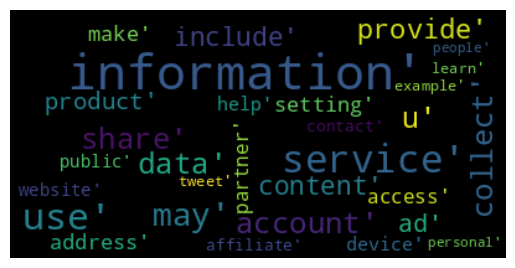

In [ ]:
# # create Word Clouds

from wordcloud import WordCloud    
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=40, collocations=False, max_words=30).generate(newtwittercontent)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# save Word Clouds
! mkdir wordclouds
wordcloud.to_file(f"wordclouds/word_cloud_twitter.png")

# Establish lexical density
# text_clean_slice = text_clean [0:600]
# ld_results = len(set(text_clean_slice)) / len(text_clean_slice)
# print(ld_results)
# ld_dict = {'File_name': filepath, 'lexical_density': ld_results}
# lexical_density.append(ld_dict)

# print(lexical_density)

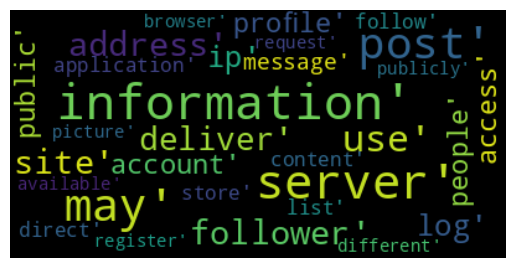

In [ ]:
wordcloud2 = WordCloud(max_font_size=40, collocations=False, max_words=30).generate(newmastodoncontent)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# save Word Clouds
wordcloud.to_file(f"wordclouds/word_cloud_mastodon.png")

Both Twitter and Mastodon have "information" as the most frequenty used term. It makes sense given the privacy policy is about how the company addresses user information.

Some other notable terms from Twitter include "provide", "share", "ad", "access", "affiliate", "partner", and "collect." 

There were many mentions of sharing the data as previously noted in the document. This can be due to how much data Twitter collects and uses to generate profit, through advertisement. 

For Mastodon, notable terms were "server", "deliver", "IP", "site", "register", "log."

This can be due to how Mastodon operates with distributed servers. 

What is most interesting from the wordcloud is that both Twitter and Matodon had the term "may" in their top 30 most frequently used terms. The use of term "may" can create confusion to the users as "may" in definition expresses possibility.

For instance, Twitter provides following statement:

“Professional Accounts. If you create a professional account, you also need to provide us with a professional category, and ***may*** provide us with other information, including street address, contact email address, and contact phone number, all of which will always be public."

Also,

“3.4 With our Affiliates.
We ***may*** share information amongst our affiliates to provide our products and services.”

"May" could be interpreted as optional information that users could provide but it can also be interpreted as Twitter possibly sharing information with other parties. 

As for Mastodon, their policy provides as follows:

“Basic account information: If you register on this server, you ***may*** be asked to enter a username, an e- mail address and a password. You ***may*** also enter additional profile information such as a display name and biography, and upload a profile picture and header image. The username, display name, biography, profile picture and header image are always listed publicly.”

Unless there are alternative ways to register on the server, this statement should be more definitive than merely expressing possibility.

Both Twitter and Mastodon could provide clearer language surrounding how the data is collected and shared, if those data are certainly collected, used and shared. 


## Lexical Density

[Lexical density](https://osawec.elc.cityu.edu.hk/repo/front-page/writing-tips/lexical-density/#:~:text=Assessed%20with%20Lexical%20Density%2C%20a,nouns%20while%20adverbs%20modify%20verbs) is used to find out the density of text or speech by dividing the number of lexical words by total number of words. Lexical words are verbs, nouns, adjectives and adverbs. According to [Languages Humanities](https://www.languagehumanities.org/what-is-lexical-density.htm),  a balanced lexicon density would be around 50%, whereas academic papers, government documents and jargon-filled documents tend to produce higher densities.

In [ ]:
# Establish lexical density for Twitter
text_clean_slice = newtwittercontent [0:1000]
ld_results = len(set(text_clean_slice)) / len(text_clean_slice)

print(ld_results)

0.029


In [ ]:
# Establish lexical density for Mastodon
text_clean_slice2 = newmastodoncontent [0:1000]
ld_results2 = len(set(text_clean_slice2)) / len(text_clean_slice2)
print(ld_results2)

0.027


Considering both Mastodon and Twitter are measured to be less than 50%, we can infer that the documents are not as jargon heavy, and therefore should be easy for users to read and comprehend.


## TF-IDF

TF-IDF aims to identify the most distinctively frequent or significant words in a document. 

First, download necessary libraries

In [ ]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 600
from pathlib import Path  
import glob

Set Directory

In [ ]:
directory_path = "files_cleaned/"
text_files = glob.glob(f"{directory_path}/*.txt")

In [ ]:
text_files

['files_cleaned/mastodon_cleaned.txt', 'files_cleaned/twitter_cleaned.txt']

In [ ]:
text_titles = [Path(text).stem for text in text_files]

In [ ]:
text_titles

['mastodon_cleaned', 'twitter_cleaned']

Run TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [ ]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

Turn the result into dataframe

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df = tfidf_df.stack().reset_index()

Rename Dataframe Columns

In [ ]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term'})

Print top 10 terms and highest tfidf scores

In [ ]:
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

,document,term,tfidf
562,mastodon_cleaned,server,0.469758
306,mastodon_cleaned,information,0.351828
450,mastodon_cleaned,post,0.281462
252,mastodon_cleaned,follower,0.222517
641,mastodon_cleaned,use,0.193505
23,mastodon_cleaned,address,0.158323
575,mastodon_cleaned,site,0.158323
473,mastodon_cleaned,proﬁle,0.148345
174,mastodon_cleaned,deliver,0.140731
591,mastodon_cleaned,store,0.123621


Visualize the TFIDF using altair

In [ ]:
!pip install altair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['information', 'share']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

The result is similar to what was shown using WordCloud. 

Both Twitter and Mastodon have "information" as top 2 used term in terms of frequency as this is an analysis of privacy policy. Considering the low TF-IDF scores throughout the top 10 terms, it is difficult to conclude which policy has more depth. However, this analysis demonstrates how these two companies operate. Mastodon highlights its servers while Twitter highlights its service. 



## Limitations
It should be noted that the main distinction between Twitter and Mastodon is the difference in servers. This means that Twitter has one server that collects and stores all data and is governed by Twitter’s own privacy policy, while Mastodon has several servers among which the data are collected, is based on user’s choice, and follow both [Mastodon and the servers’ own privacy policies](https://themarkup.org/the-breakdown/2022/11/21/we-joined-mastodon-heres-what-we-learned-about-privacy-and-security ). Considering Mastodon has more than [12,000 servers](https://mastodon.help/instances/en ), this research will only contain privacy policies of Mastodon itself, not its servers. 


##Replicability

The code above can be used for other platforms and policies as long as the text is scraped from PDF filetypes. It would be interesting to see how other platforms that are as mature as Twitter, such as Facebook and Youtube, write their privacy policies. It would also be interesting to analyze other policies such as community guidelines or codes of conduct to answer other research questions. 


## Conclusion

This paper aimed to compare the privacy policies of Twitter and Mastodon with a hypothesis that Mastodon will have a better privacy policy. 

The analysis involved answering 7 questions on necessary information that should be included in the privacy policy, looking at vague and technical jargon, analyzing lexical density, as well as significant and frequent terms. The research finds that both Twitter and Mastodon fail to answer some of the 7 questions such as providing how data is secured and protected, who to contact regarding privacy, as well as establishing the legal basis for daqta collection. The weight of each question is left to the interpretation of the reader. In terms of technical jargon, while both Twitter and Mastodon use abbreviations, only Maston provided a full definition of abbreviations. However, both use vague language throughout their privacy policies by using the term "may" in many instances. Both Twitter and Mastodon should provide more certainty in their policy on how the users’ data are collected, used and shared by using concrete terms. By analyzing lexical density, the research finds that both Twitter and Mastodon write their policy in comprehensible ways, however, the focus of both policies are different as the two companies operate their businesses in distinct ways. Ultimately, as both companies lack clarity on their privacy policies in different areas, the hypothesis that Mastodon’s privacy policy is better than Twitter is inconclusive.
